In [1]:
DATASET_DIR = "../input/covid19-global-forecasting-week-2"
TRAIN_FILE = DATASET_DIR + "/train.csv"
TEST_FILE = DATASET_DIR + "/test.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from datetime import datetime

## EDA 

In [3]:
df_train = pd.read_csv(TRAIN_FILE)
df_train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [4]:
df_test = pd.read_csv(TEST_FILE)
df_test.head(5)

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-19
1,2,NaN,Afghanistan,2020-03-20
2,3,NaN,Afghanistan,2020-03-21
3,4,NaN,Afghanistan,2020-03-22
4,5,NaN,Afghanistan,2020-03-23


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20580 entries, 0 to 20579
Data columns (total 6 columns):
Id                20580 non-null int64
Province_State    8750 non-null object
Country_Region    20580 non-null object
Date              20580 non-null object
ConfirmedCases    20580 non-null float64
Fatalities        20580 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 964.8+ KB


In [6]:
df_train["Province_State"].isnull().sum()

11830

In [7]:
df_train.isnull().sum()

Id                    0
Province_State    11830
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [8]:
df_train[df_train["Province_State"].notnull()]

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
560,801,Australian Capital Territory,Australia,2020-01-22,0.0,0.0
561,802,Australian Capital Territory,Australia,2020-01-23,0.0,0.0
562,803,Australian Capital Territory,Australia,2020-01-24,0.0,0.0
563,804,Australian Capital Territory,Australia,2020-01-25,0.0,0.0
564,805,Australian Capital Territory,Australia,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
20085,28666,Montserrat,United Kingdom,2020-03-27,5.0,0.0
20086,28667,Montserrat,United Kingdom,2020-03-28,5.0,0.0
20087,28668,Montserrat,United Kingdom,2020-03-29,5.0,0.0
20088,28669,Montserrat,United Kingdom,2020-03-30,5.0,0.0


In [9]:
# reformat dates
df_train['Date'] = pd.to_datetime(df_train['Date'], infer_datetime_format=True)
df_test['Date'] = pd.to_datetime(df_test['Date'], infer_datetime_format=True)

In [10]:
df_train.loc[:2,:'Date']

,Id,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-01-22
1,2,NaN,Afghanistan,2020-01-23
2,3,NaN,Afghanistan,2020-01-24


In [11]:
pd.plotting.register_matplotlib_converters()
grouped_data = df_train.groupby('Date')['Date', 'ConfirmedCases', 'Fatalities'].sum().reset_index()
grouped_data = grouped_data.sort_values(by=['Date'], ascending=True) 
grouped_data['ConfirmedCases'] = grouped_data['ConfirmedCases'].astype(int)
grouped_data['Fatalities'] = grouped_data['Fatalities'].astype(int)
grouped_data.head()

,Date,ConfirmedCases,Fatalities
0,2020-01-22,554,17
1,2020-01-23,653,18
2,2020-01-24,939,26
3,2020-01-25,1432,42
4,2020-01-26,2113,56


In [12]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
grouped_data = df_train.groupby(['Date'],as_index=True).agg({'ConfirmedCases': 'max','Fatalities': 'max'})
grouped_data['ConfirmedCases'] = grouped_data['ConfirmedCases'].astype(int)
grouped_data['Fatalities'] = grouped_data['Fatalities'].astype(int)
display(grouped_data.head())

,ConfirmedCases,Fatalities
Date,,
2020-01-22,444,17
2020-01-23,444,17
2020-01-24,549,24
2020-01-25,761,40
2020-01-26,1058,52


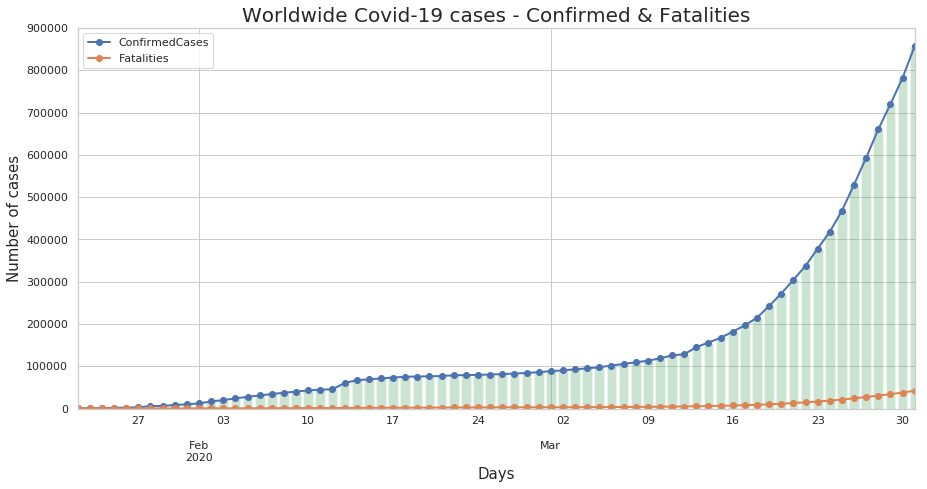

In [13]:
grouped_data = df_train.groupby('Date').sum()[['ConfirmedCases', 'Fatalities']]
sns.set(style = 'whitegrid')
grouped_data.plot(kind='line', figsize = (15,7) , marker='o',linewidth=2)
plt.bar(grouped_data.index, grouped_data['ConfirmedCases'],alpha=0.3,color='g')
plt.xlabel('Days', fontsize=15)
plt.ylabel('Number of cases', fontsize=15)
plt.title('Worldwide Covid-19 cases - Confirmed & Fatalities',fontsize=20)
plt.legend()
plt.show()

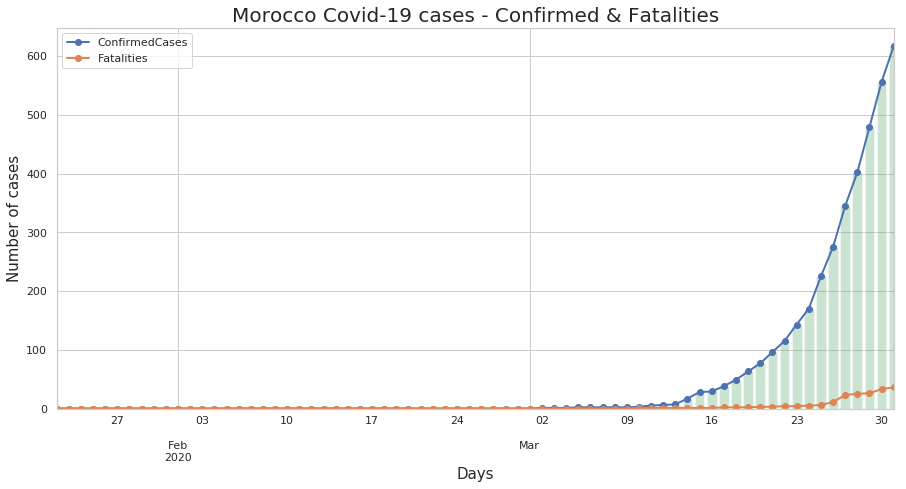

In [14]:
grouped_data = df_train[df_train['Country_Region']=='Morocco'].groupby('Date').sum()[['ConfirmedCases', 'Fatalities']]
sns.set(style = 'whitegrid')
grouped_data.plot(kind='line', figsize = (15,7) , marker='o',linewidth=2)
plt.bar(grouped_data.index, grouped_data['ConfirmedCases'],alpha=0.3,color='g')
plt.xlabel('Days', fontsize=15)
plt.ylabel('Number of cases', fontsize=15)
plt.title('Morocco Covid-19 cases - Confirmed & Fatalities',fontsize=20)
plt.legend()
plt.show()

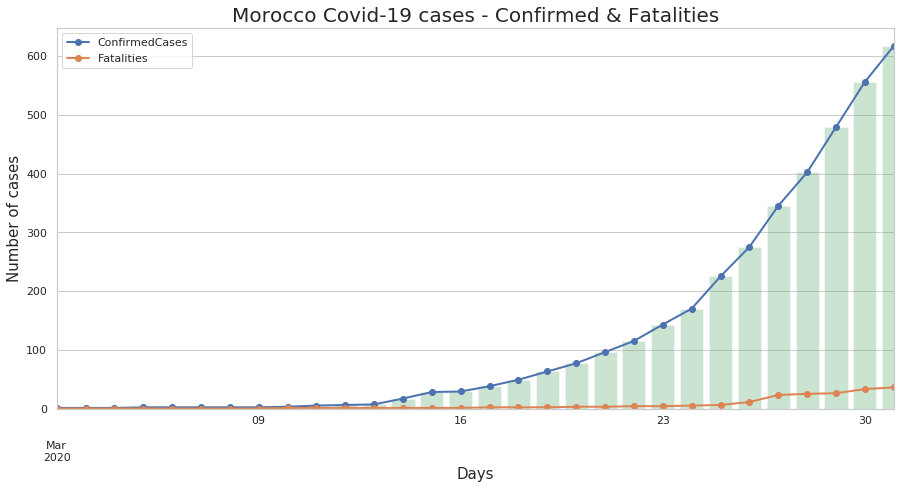

In [15]:
grouped_data = df_train[(df_train['Country_Region']=='Morocco') & (df_train['ConfirmedCases']>0)].groupby('Date').sum()[['ConfirmedCases', 'Fatalities']]
sns.set(style = 'whitegrid')
grouped_data.plot(kind='line', figsize = (15,7) , marker='o',linewidth=2)
plt.bar(grouped_data.index, grouped_data['ConfirmedCases'],alpha=0.3,color='g')
plt.xlabel('Days', fontsize=15)
plt.ylabel('Number of cases', fontsize=15)
plt.title('Morocco Covid-19 cases - Confirmed & Fatalities',fontsize=20)
plt.legend()
plt.show()

In [16]:
grouped_data = df_train.groupby('Country_Region')['ConfirmedCases', 'Fatalities'].sum().reset_index()
grouped_data = grouped_data.sort_values(by=['ConfirmedCases'], ascending=False) 
grouped_data['ConfirmedCases'] = grouped_data['ConfirmedCases'].astype(int)
grouped_data['Fatalities'] = grouped_data['Fatalities'].astype(int)
grouped_data.head(10)

,Country_Region,ConfirmedCases,Fatalities
33,China,4186795,145794
81,Italy,1211089,116529
162,US,1082264,18071
147,Spain,742697,54579
62,Germany,588758,3876
77,Iran,527564,34371
58,France,410812,21349
87,"Korea, South",257082,2689
166,United Kingdom,165706,9122
152,Switzerland,155137,2566


In [17]:
grouped_data = df_train.groupby('Country_Region')['ConfirmedCases', 'Fatalities'].sum().reset_index()
grouped_data_sort_confirmed_cases = grouped_data.sort_values(by=['ConfirmedCases', 'Fatalities'], ascending=False)[:10] 
grouped_data_sort_fatalities = grouped_data.sort_values(by=['Fatalities', 'ConfirmedCases'], ascending=False)[:10] 

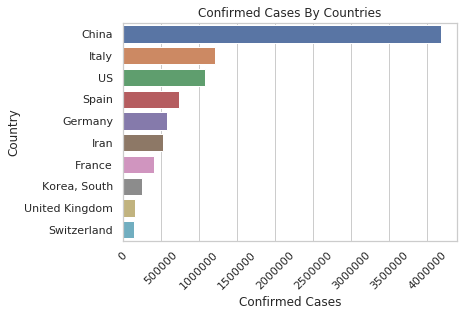

In [18]:
sns.barplot(x="ConfirmedCases", y="Country_Region", data=grouped_data_sort_confirmed_cases)
plt.xticks(rotation=45)
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.title("Confirmed Cases By Countries")
plt.show()

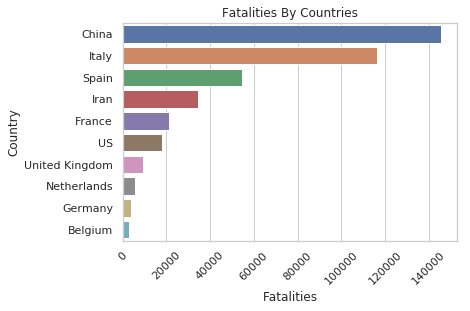

In [19]:
sns.barplot(x="Fatalities", y="Country_Region", data=grouped_data_sort_fatalities)
plt.xticks(rotation=45)
plt.xlabel("Fatalities")
plt.ylabel("Country")
plt.title("Fatalities By Countries")
plt.show()

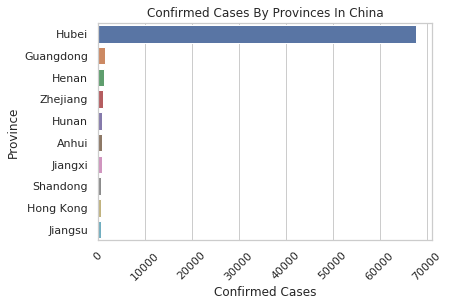

In [20]:
df_china = df_train[df_train['Country_Region'] == "China"]
df_china = df_china[df_china['Date'] == max(df_china['Date'])]
grouped_data = df_china.groupby('Province_State')['ConfirmedCases', 'Fatalities'].max().reset_index()

grouped_data_sort = grouped_data.sort_values(by=['ConfirmedCases', 'Fatalities'], ascending=False)[:10] 

fig = sns.barplot(x="ConfirmedCases", y="Province_State", data=grouped_data_sort)

plt.xticks(rotation=45)
plt.xlabel("Confirmed Cases")
plt.ylabel("Province")
plt.title("Confirmed Cases By Provinces In China")
plt.show()

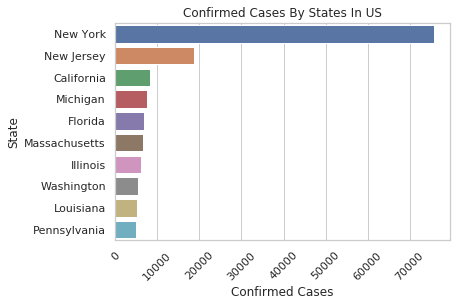

In [21]:
df_china = df_train[df_train['Country_Region'] == "US"]
df_china = df_china[df_china['Date'] == max(df_china['Date'])]
grouped_data = df_china.groupby('Province_State')['ConfirmedCases', 'Fatalities'].max().reset_index()

grouped_data_sort = grouped_data.sort_values(by=['ConfirmedCases', 'Fatalities'], ascending=False)[:10] 

fig = sns.barplot(x="ConfirmedCases", y="Province_State", data=grouped_data_sort, label="Confirmed Fatalities In China")

plt.xticks(rotation=45)
plt.xlabel("Confirmed Cases")
plt.ylabel("State")
plt.title("Confirmed Cases By States In US")
plt.show()

## Data cleaning

In [22]:
train_data = df_train.copy()
train_data.drop('Province_State',axis=1,inplace=True)

test_data = df_test.copy()
test_data.drop('Province_State',axis=1,inplace=True)

train_data['Date'] = train_data['Date'].dt.strftime("%m%d").astype(int)
test_data['Date'] = test_data['Date'].dt.strftime("%m%d").astype(int)


In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
train_data['Country_Region']=LE.fit_transform(train_data['Country_Region'])
test_data['Country_Region']=LE.transform(test_data['Country_Region'])

In [24]:
train_data.tail()

,Id,Country_Region,Date,ConfirmedCases,Fatalities
20575,29366,172,327,5.0,1.0
20576,29367,172,328,7.0,1.0
20577,29368,172,329,7.0,1.0
20578,29369,172,330,7.0,1.0
20579,29370,172,331,8.0,1.0


In [25]:
x_cols = ['Date','Country_Region']
y_cols = ['ConfirmedCases', 'Fatalities']

train_data[x_cols].head(10)

,Date,Country_Region
0,122,0
1,123,0
2,124,0
3,125,0
4,126,0
5,127,0
6,128,0
7,129,0
8,130,0
9,131,0


## Model

In [26]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

mmodel_dtr = DecisionTreeRegressor(max_depth=10) 
param_grid = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.1, 0.01, 0.001]
             }
model_abr = AdaBoostRegressor(base_estimator=mmodel_dtr)
model = RandomizedSearchCV(estimator = model_abr, param_distributions = param_grid,
                    n_iter = 100, cv = 3, verbose=0, random_state=2020, n_jobs = -1)
model.fit(train_data[x_cols], train_data[y_cols[0]])
predictions1 = model.predict(test_data[x_cols])


model = RandomizedSearchCV(estimator = model_abr, param_distributions = param_grid,
                    n_iter = 100, cv = 3, verbose=0, random_state=2020, n_jobs = -1)
model.fit(train_data[x_cols], train_data[y_cols[0]])
predictions2 = model.predict(test_data[x_cols])

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [27]:
predictions1[:50]

array([ 38.38461538,  43.08333333,  51.33333333,  79.        ,
        93.66666667, 102.58333333, 111.5       , 111.5       ,
       117.5       , 130.        , 170.        , 170.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        ,  55.5       ,
        60.66666667,  82.5       ,  98.25      , 106.        ,
       123.        , 138.3125    ])

In [28]:
predictions2[:50]

array([ 42.36363636,  42.31034483,  52.625     ,  69.29166667,
        80.5       ,  90.5       ,  94.        , 110.        ,
       114.        , 114.        , 120.        , 170.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        , 174.        ,
       174.        , 174.        , 174.        ,  56.11111111,
        69.29166667,  82.42857143,  97.83333333, 108.        ,
       123.        , 140.61111111])

## Generate Predictions

In [29]:
submission = pd.DataFrame({'ForecastId':test_data['ForecastId'],'ConfirmedCases':predictions1,'Fatalities':predictions2})
submission['ConfirmedCases'] = submission['ConfirmedCases'].astype(int)
submission['Fatalities'] = submission['Fatalities'].astype(int)
submission.head(50)

,ForecastId,ConfirmedCases,Fatalities
0,1,38,42
1,2,43,42
2,3,51,52
3,4,79,69
4,5,93,80
5,6,102,90
6,7,111,94
7,8,111,110
8,9,117,114
9,10,130,114


In [30]:
filename = 'submission.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: submission.csv
